<a href="https://colab.research.google.com/github/Tasneem-Ibrahim/Agentic-AI/blob/main/Multi_Agent_Task_Orchestration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Multi-Agent Task Orchestration

This project demonstrates a modular, agent-based AI orchestration system using Google's Gemini API (OpenAI-compatible). It simulates a real-world software development environment where specialized agents collaborate to handle frontend, backend, mobile, and DevOps tasks through delegation and coordination.



## Architecture Overview

- **Panacloud Assistant**: Oversees the development workflow.
- **Agentic AI**: Delegates tasks to specialized agents.
- **Specialized Agents**:
  - Web Developer
  - App Developer
  - Backend Developer
  - DevOps Engineer

Agents communicate and hand off responsibilities using `openai-agents` with Gemini as the backend model provider.


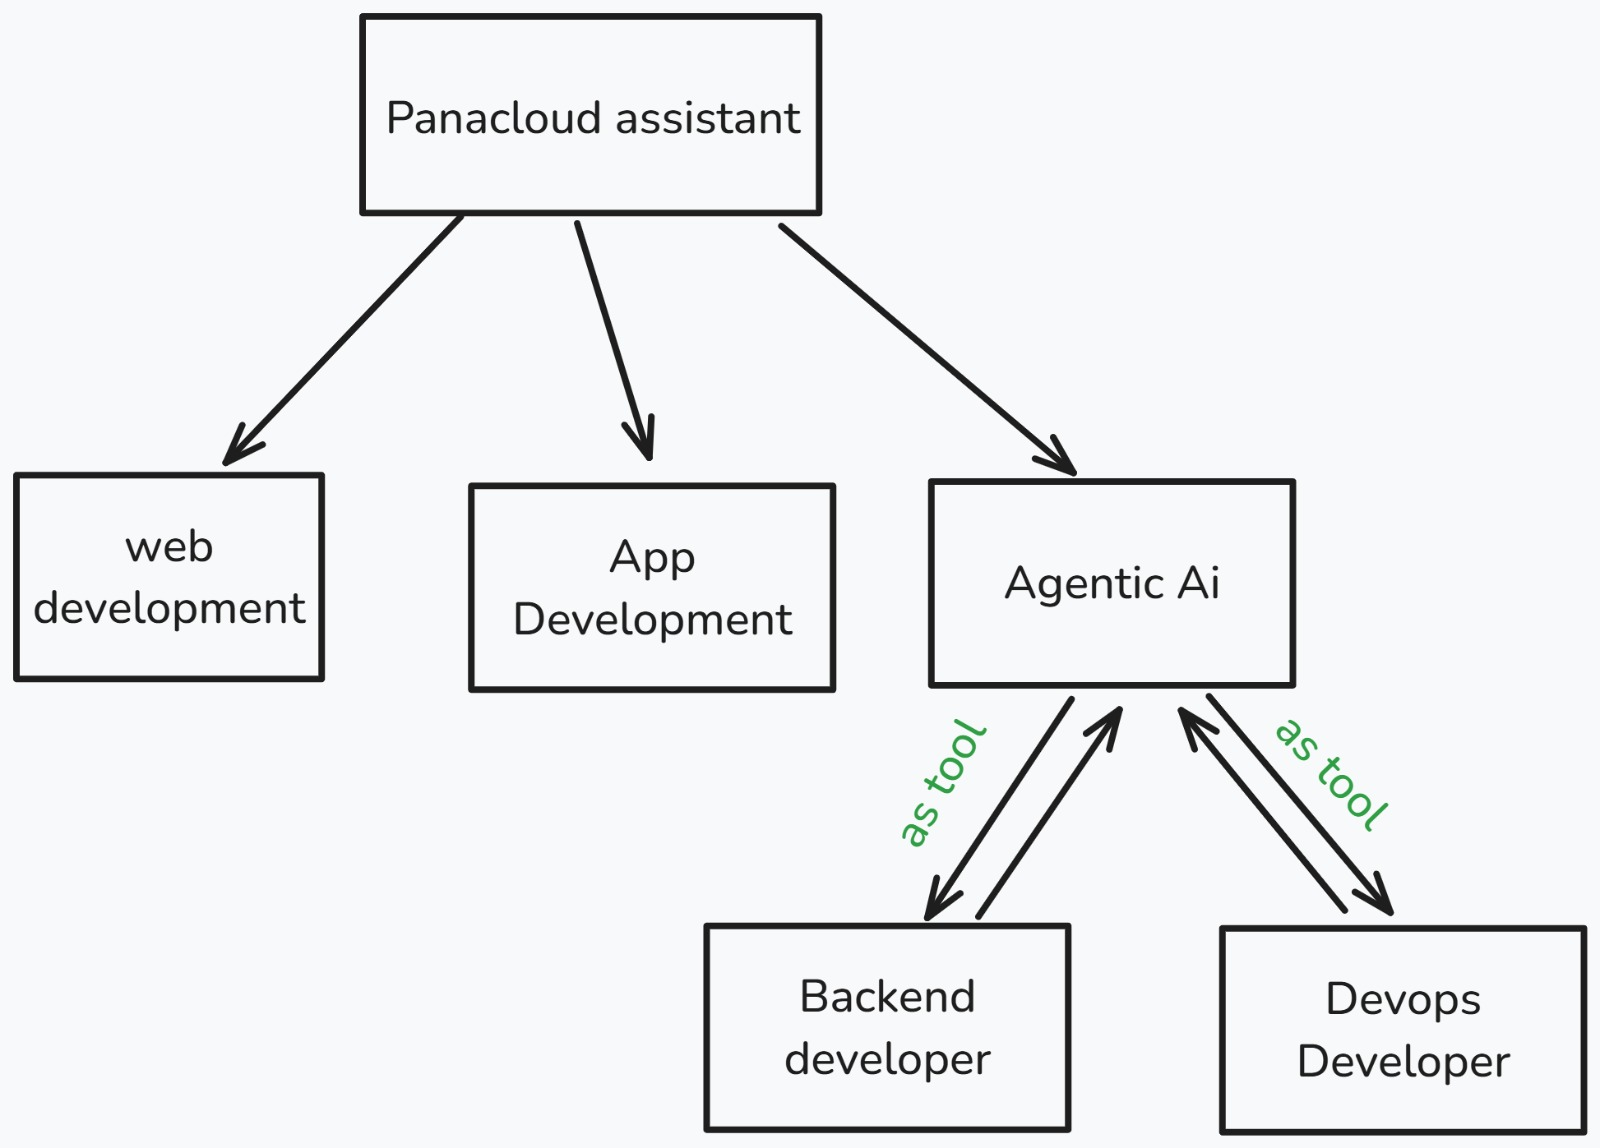

In [ ]:
!pip install -Uq openai-agents

In [ ]:
import nest_asyncio
nest_asyncio.apply()

In [ ]:
import os
from google.colab import userdata
from agents import Agent, Runner, AsyncOpenAI, OpenAIChatCompletionsModel
from agents.run import RunConfig
from google.colab import userdata



In [ ]:
gemini_api_key = userdata.get("GEMINI_API_KEY")


# Check if the API key is present; if not, raise an error
if not gemini_api_key:
    raise ValueError("GEMINI_API_KEY is not set. Please ensure it is defined in your .env file.")

#Reference: https://ai.google.dev/gemini-api/docs/openai
external_client = AsyncOpenAI(
    api_key=gemini_api_key,
    base_url="https://generativelanguage.googleapis.com/v1beta/openai/",
)

model = OpenAIChatCompletionsModel(
    model="gemini-2.0-flash",
    openai_client=external_client
)

config = RunConfig(
    model=model,
    model_provider=external_client,
    tracing_disabled=True
)

In [ ]:
import logging
logging.getLogger("openai.agents").setLevel(logging.ERROR)


In [ ]:
from agents import Agent, Runner

# Define specialized agents
web_dev_agent = Agent(
    name="Web Developer",
    instructions="Handle frontend development tasks.",
    model=model
)

app_dev_agent = Agent(
    name="App Developer",
    instructions="Manage mobile application development.",
     model=model
)

backend_dev_agent = Agent(
    name="Backend Developer",
    instructions="Develop server-side logic and APIs.",
    model=model
)

devops_agent = Agent(
    name="DevOps Engineer",
    instructions="Oversee deployment and infrastructure.",
    model=model
)

# Define Agentic AI agent that can delegate tasks
agentic_ai = Agent(
    name="Agentic AI",
    instructions=(
        "Assist in development tasks. "
        "Delegate frontend tasks to Web Developer, "
        "mobile tasks to App Developer, "
        "backend tasks to Backend Developer, "
        "and deployment tasks to DevOps Engineer."
    ),
    model=model,
    handoffs=[ backend_dev_agent, devops_agent]
)

# Define the main assistant agent
panacloud_assistant = Agent(
    name="Panacloud Assistant",
    instructions=(
        "Coordinate the development process. "
        "Utilize Agentic AI for task delegation."
    ),
    model=model,
    handoffs=[web_dev_agent, app_dev_agent, agentic_ai]
)


In [ ]:
result = Runner.run_sync(
    starting_agent=panacloud_assistant,
    input="We need to develop a new mobile application with a robust backend and deploy it efficiently."
)
print(result.last_agent.name)
print(result.final_output)


App Developer
Okay, I am now in App Developer Mode.

Let's break down the process of developing a new mobile application with a robust backend and efficient deployment. To start, I need more information to understand the scope and requirements.  Please tell me more about the project, including:

**1. App Functionality & Purpose:**

*   What problem does this app solve?
*   What are the core features and functionalities?
*   Who is the target audience?
*   Are there any similar apps currently available?  What are their strengths and weaknesses?

**2. Platform & Devices:**

*   Target platform(s): iOS, Android, or both (cross-platform)?
*   Target devices: Smartphones, tablets, specific device models?
*   Operating system versions to support (minimum and target)?

**3. Backend Requirements:**

*   Data storage needs:  How much data will be stored? What type of data (e.g., user data, media files, transactional data)?
*   Backend functionality: User authentication, data synchronization, pu